### scikit-mobility tutorials

# 3 - Trajectory models

Generative models of individual trajectories.

- [Density EPR](#Density-EPR)

In [1]:
import skmob

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Exploration and Preferential Return EPR

### Density EPR

In [2]:
from skmob.models.epr import DensityEPR
from skmob.models.epr import load_spatial_tessellation, compute_od_matrix

In [3]:
start_time = pd.to_datetime('2019/01/01 08:00:00')
end_time = pd.to_datetime('2019/01/14 08:00:00')
depr = DensityEPR()

In [4]:
spatial_tessellation = load_spatial_tessellation('data/location2info_trentino')

6259it [00:00, 194379.73it/s]


In [5]:
print(len(spatial_tessellation))
list(spatial_tessellation.items())[:5]

6256


[(0, {'lat': 46.1406015715, 'lng': 10.715532135, 'relevance': 3140}),
 (1, {'lat': 46.1404065626, 'lng': 10.7284735947, 'relevance': 10181}),
 (2, {'lat': 46.1417408692, 'lng': 10.6378806147, 'relevance': 539}),
 (3, {'lat': 46.1415546479, 'lng': 10.6508228586, 'relevance': 106}),
 (4, {'lat': 46.1421089176, 'lng': 10.6119957464, 'relevance': 1400})]

In [6]:
tdf = depr.generate(start_time, end_time, spatial_tessellation, 
                    n_agents=100, od_matrix=None, verbose=True)

100%|██████████| 100/100 [01:13<00:00,  1.85it/s]


In [7]:
tdf.parameters

{'model': {'class': <function skmob.models.epr.DensityEPR.__init__(self, name='Density EPR model', rho=0.6, gamma=0.21, beta=0.8, tau=17, min_wait_time_minutes=20)>,
  'generate': {'start_date': Timestamp('2019-01-01 08:00:00'),
   'end_date': Timestamp('2019-01-14 08:00:00'),
   'n_agents': 100,
   'starting_location': None,
   'random_state': None,
   'verbose': True}}}

In [8]:
tdf.head()

,uid,datetime,lat,lng
0,1,2019-01-01 08:00:00.000000,46.371135,11.801920
1,1,2019-01-01 13:28:50.277903,46.080387,11.088736
2,1,2019-01-01 17:07:58.797520,46.371135,11.801920
3,1,2019-01-01 17:38:53.142459,46.371135,11.801920
4,1,2019-01-01 18:20:29.073683,46.080387,11.088736


In [9]:
from skmob.preprocessing import detection, clustering

In [10]:
stops_tdf = detection.stops(tdf, spatial_radius=0.2)
cluster_tdf = clustering.cluster(stops_tdf)

In [22]:
agent_id = 1

tdf[tdf.uid == agent_id].head()

,uid,datetime,lat,lng
0,1,2019-01-01 08:00:00.000000,46.371135,11.801920
1,1,2019-01-01 13:28:50.277903,46.080387,11.088736
2,1,2019-01-01 17:07:58.797520,46.371135,11.801920
3,1,2019-01-01 17:38:53.142459,46.371135,11.801920
4,1,2019-01-01 18:20:29.073683,46.080387,11.088736


In [23]:
map_an_agent = tdf[tdf.uid == agent_id].plot_trajectory(hex_color='#666666')
cluster_tdf[cluster_tdf.uid == agent_id].plot_stops(map_f=map_an_agent)


In [24]:
drange = ((cluster_tdf['datetime'] > pd.to_datetime('2019/01/01 08:00:00')) &
          (cluster_tdf['datetime'] < pd.to_datetime('2019/01/07 08:00:00')))

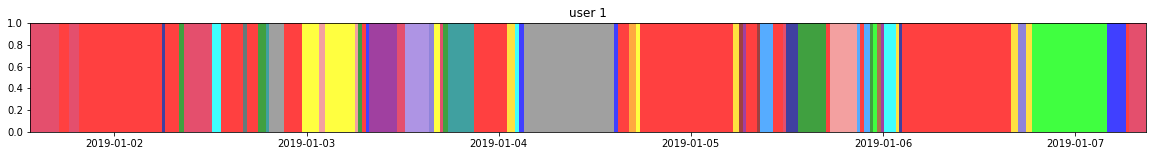

In [25]:
ax = cluster_tdf[drange].plot_diary(agent_id)

In [26]:
cluster_tdf[drange & (cluster_tdf['uid'] == agent_id)].head()

,uid,datetime,lat,lng,leaving_datetime,cluster
1,1,2019-01-01 13:28:50.277903,46.080387,11.088736,2019-01-01 17:07:58.797520,8
2,1,2019-01-01 17:07:58.797520,46.371135,11.801920,2019-01-01 18:20:29.073683,0
3,1,2019-01-01 18:20:29.073683,46.080387,11.088736,2019-01-01 19:32:07.249665,8
4,1,2019-01-01 19:32:07.249665,46.371135,11.801920,2019-01-01 22:54:17.270708,0
5,1,2019-01-01 22:54:17.270708,46.260505,11.082593,2019-01-02 05:24:24.197269,63


In [27]:
from skmob.measures.individual import jump_lengths, radius_of_gyration, waiting_times

In [28]:
jls_df = jump_lengths(tdf)
jls_df.head()

100%|██████████| 100/100 [00:00<00:00, 272.29it/s]


,uid,jump_lengths
0,1,"[63.67966277375051, 63.67966277375051, 0.0, 63..."
1,2,"[0.0, 3.9891832532994265, 5.085630296622661, 4..."
2,3,"[2.992087697573772, 2.0012429537673513, 29.906..."
3,4,"[0.0, 0.0, 29.839785720552907, 34.916935245240..."
4,5,"[3.1632220631815153, 2.231454772536734, 0.0, 0..."


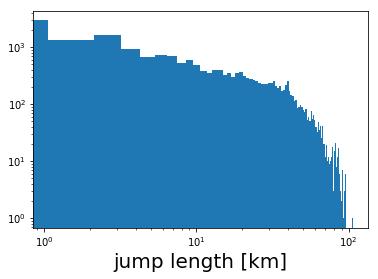

In [29]:
jls = []
for x in jls_df.jump_lengths:
    jls.extend(x)

plt.hist(jls, bins=100)
plt.xlabel('jump length [km]', fontsize=20)
plt.loglog()
plt.show()

In [30]:
wts_df = waiting_times(tdf)
wts_df.head()

100%|██████████| 100/100 [00:00<00:00, 433.06it/s]


,uid,waiting_times
0,1,"[19730.0, 13148.0, 1854.0, 2495.0, 4298.0, 121..."
1,2,"[36132.0, 1321.0, 1507.0, 4736.0, 2442.0, 3750..."
2,3,"[1367.0, 7261.0, 2017.0, 2947.0, 7171.0, 1407...."
3,4,"[1437.0, 1205.0, 1247.0, 1302.0, 4202.0, 1344...."
4,5,"[8148.0, 17432.0, 2183.0, 1336.0, 9127.0, 2708..."


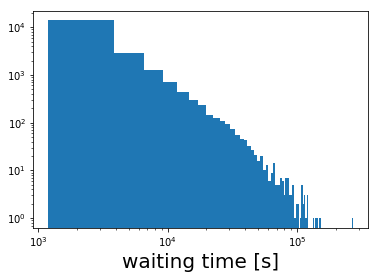

In [31]:
wts = []
for x in wts_df.waiting_times:
    wts.extend(x)

plt.hist(wts, bins=100)
plt.xlabel('waiting time [s]', fontsize=20)
plt.loglog()
plt.show()

100%|██████████| 100/100 [00:00<00:00, 321.41it/s]


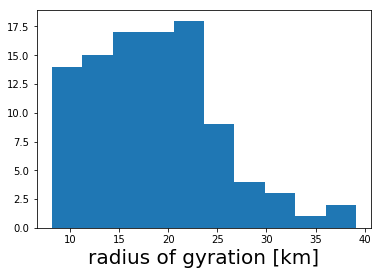

In [32]:
rg_df = radius_of_gyration(tdf)
plt.hist(rg_df.radius_of_gyration.values, bins=10)
plt.xlabel('radius of gyration [km]', fontsize=20)
plt.show()